In [30]:
# Set up environment

## PS> cd <repo>
## PS> python -m venv venv
## PS> venv\Scripts\activate #  for linux/gitbash: source venv/Scripts/activate
## %pip install -r requirements.txt

# Load required packages
## (venv) $ python -m pip install dash==2.8.1 pandas==1.5.3

# streamlit run streamlit_app.py


In [2]:
%load_ext autoreload
%autoreload 2

# sys.path.insert(1, '../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup

In [3]:
from utils_logging import close_log_handlers

close_log_handlers()

In [4]:
import pandas as pd
import logging
import os

from utils_logging import setup_logging, close_log_handlers

# Setup logging
close_log_handlers()
setup_logging()
logger = logging.getLogger(__name__)


# Create the pickle_files directory if it doesn't exist
pkl_folder_name="pickle_files"
os.makedirs(pkl_folder_name, exist_ok=True)
logger.info(f"Folder '{pkl_folder_name}' has been created or already exists.")

INFO:__main__:Folder 'pickle_files' has been created or already exists.


# Read Yamls

In [10]:
from read_yaml_files import read_yamls

(
    aliases_dict,
    color_discrete_map,
    data_config_dict,
    date_column,
    outputs_config_dict,
) = read_yamls()

# Grouping Columns
company_column = data_config_dict['column_settings']['company_column'] # 'Institution Name'
default_company = data_config_dict['column_settings']['default_company'] # 'Macquarie Bank Limited'


# Load data

In [6]:
file = r"C:\Users\tyewf\github_projects\apra_monthly_adi_statistics\pickle_files\df_original.pkl"
if os.path.exists(file):
    os.remove(file)
file = r"C:\Users\tyewf\github_projects\apra_monthly_adi_statistics\pickle_files\df_summary.pkl"
if os.path.exists(file):
    os.remove(file)

In [7]:
from data_loading import data_loader

# Get data
df_original, df_summary = data_loader(
    pkl_folder_name=pkl_folder_name,
    data_config_dict=data_config_dict,
    date_column=date_column,
)
# TO DO: add in check that companies are all unique - if not, make them (add abn)

INFO:data_loading:Executing: data_loader
INFO:data_loading:Loading data from APRA website
INFO:data_loading:Excel file has already been downloaded.
INFO:data_loading:Excel data loaded successfully.
INFO:data_loading:Executed: data_loader


In [8]:
file = r"C:\Users\tyewf\github_projects\apra_monthly_adi_statistics\pickle_files\df_original.pkl"
if os.path.exists(file):
    os.remove(file)
file = r"C:\Users\tyewf\github_projects\apra_monthly_adi_statistics\pickle_files\df_summary.pkl"
if os.path.exists(file):
    os.remove(file)

In [9]:
df_original[0:20]
# df_summary[0:2]

,Period,Institution Name,Cash and deposits with financial institutions,Trading securities,Investment securities,Net acceptances of customers,Total residents assets,Total securitised assets on balance sheet,Loans to non-financial businesses,Loans to financial institutions,...,Loans to non-financial businesses - Rank,Loans to community service organisations - Rank,Deposits by households - Rank,Loans to financial institutions - Rank,Loans to households: Credit cards - Rank,Deposits by community service organisations - Rank,Total long-term borrowings - Rank,Loans to households: Housing: Investment - Rank,Deposits by financial institutions - Rank,Total short-term borrowings - Rank
7542,2019-03-31,Woori Bank,3.090000e+07,0.0,2.920000e+07,0.0,3.945000e+08,0.000000e+00,3.506000e+08,0.000000e+00,...,47,23,87,70,50,66,56,77,100,66
7450,2019-03-31,Community CPS Australia Limited,9.870000e+07,0.0,7.426000e+08,0.0,6.763900e+09,1.655000e+09,1.638000e+08,7.540000e+07,...,58,27,21,41,24,17,56,23,56,76
7451,2019-03-31,Community First Credit Union Limited,5.920000e+07,0.0,1.231000e+08,0.0,1.059200e+09,0.000000e+00,3.200000e+06,0.000000e+00,...,99,27,41,70,19,47,56,42,94,79
7452,2019-03-31,Cooperatieve Rabobank U.A.,6.390000e+07,190100000.0,2.856000e+08,0.0,1.245400e+10,0.000000e+00,4.781200e+09,0.000000e+00,...,19,5,89,70,50,70,9,77,36,18
7453,2019-03-31,Credit Suisse AG,8.790000e+07,786600000.0,0.000000e+00,0.0,6.557700e+09,0.000000e+00,2.760100e+09,1.197900e+09,...,27,11,62,15,50,70,15,56,39,14
7454,2019-03-31,Credit Union Australia Ltd,3.447000e+08,0.0,1.883900e+09,0.0,1.762250e+10,3.989500e+09,1.073000e+08,0.000000e+00,...,63,27,11,70,14,62,27,13,24,30
7455,2019-03-31,Credit Union SA Ltd,3.550000e+07,0.0,1.385000e+08,0.0,1.165900e+09,9.110000e+07,5.900000e+06,0.000000e+00,...,96,27,39,70,29,42,56,46,67,79
7456,2019-03-31,Cuscal Limited,1.016400e+09,0.0,1.057500e+09,0.0,2.185200e+09,0.000000e+00,0.000000e+00,2.700000e+06,...,110,27,89,62,50,70,56,77,22,61
7457,2019-03-31,DBS Bank Ltd,1.861000e+08,0.0,1.291700e+09,0.0,6.097200e+09,0.000000e+00,4.198200e+09,1.000000e+08,...,24,27,89,37,50,70,28,77,43,22
7458,2019-03-31,Defence Bank Limited,7.070000e+07,0.0,2.555000e+08,0.0,2.431500e+09,0.000000e+00,4.000000e+05,1.000000e+05,...,107,27,35,69,28,30,39,35,51,49


In [9]:
date = df_original['Period'][0]
df_original[df_original['Period'] == date][['Period', 'Cash and deposits with financial institutions', 'Cash and deposits with financial institutions - Rank']]

,Period,Cash and deposits with financial institutions,Cash and deposits with financial institutions - Rank
43,2024-02-29,1.519000e+08,53
42,2024-02-29,1.833000e+08,48
41,2024-02-29,2.142100e+09,12
40,2024-02-29,8.380000e+07,66
39,2024-02-29,4.365000e+08,31
...,...,...,...
91,2024-02-29,1.628000e+08,51
92,2024-02-29,1.505000e+08,54
93,2024-02-29,1.107300e+09,22
63,2024-02-29,2.109000e+09,13


## Sub-processes

In [10]:
# Arguments
data_config_dict
pkl_folder_name

'pickle_files'

In [11]:
# initiate data_dict
data_dict = {}

In [12]:
from data_loading import load_url_xlsx

original_file_name=load_url_xlsx()
original_file_name

INFO:data_loading:Excel file has already been downloaded.


'data/madis_February_2024.xlsx'

### read and process data

In [13]:
from data_loading import read_and_process_data

# Read and process data
df_source = read_and_process_data(
    data_config_dict=data_config_dict,
    file_name=original_file_name,
    date_column=date_column,
)

df_source[0:5]

INFO:data_loading:Excel data loaded successfully.


,Period,ABN,Institution Name,Cash and deposits with financial institutions,Trading securities,Investment securities,Net acceptances of customers,Total residents assets,Total securitised assets on balance sheet,Loans to non-financial businesses,...,Negotiable Certificates of Deposit,Total short-term borrowings,Total long-term borrowings,Deposits by non-financial businesses,Deposits by financial institutions,Deposits by general government,Deposits by households,Deposits by community service organisations,Total residents deposits,Business Loans
7542,2019-03-31,94150148299,Woori Bank,30900000.0,0.0,29200000.0,0.0,3.945000e+08,0.000000e+00,3.506000e+08,...,0.000000e+00,4.240000e+07,0.000000e+00,7.180000e+07,0.0,0.0,5.000000e+05,1300000.0,7.360000e+07,3.506000e+08
7450,2019-03-31,15087651143,Community CPS Australia Limited,98700000.0,0.0,742600000.0,0.0,6.763900e+09,1.655000e+09,1.638000e+08,...,0.000000e+00,1.000000e+06,0.000000e+00,5.002000e+08,165300000.0,96900000.0,3.643800e+09,113400000.0,4.519700e+09,2.392000e+08
7451,2019-03-31,80087649938,Community First Credit Union Limited,59200000.0,0.0,123100000.0,0.0,1.059200e+09,0.000000e+00,3.200000e+06,...,0.000000e+00,1.000000e+05,0.000000e+00,1.387000e+08,2000000.0,0.0,8.127000e+08,10400000.0,9.638000e+08,3.200000e+06
7452,2019-03-31,70003917655,Cooperatieve Rabobank U.A.,63900000.0,190100000.0,285600000.0,0.0,1.245400e+10,0.000000e+00,4.781200e+09,...,1.265200e+09,4.780000e+09,5.986400e+09,2.280000e+07,375300000.0,0.0,0.000000e+00,0.0,3.981000e+08,4.781200e+09
7453,2019-03-31,17061700712,Credit Suisse AG,87900000.0,786600000.0,0.0,0.0,6.557700e+09,0.000000e+00,2.760100e+09,...,3.990000e+07,5.049300e+09,3.008500e+09,1.924000e+09,332700000.0,0.0,3.291000e+08,0.0,2.585900e+09,3.958000e+09


In [14]:
# Arguments
data_config_dict
file_name = original_file_name
file_name

'data/madis_February_2024.xlsx'

In [15]:
try:
    # Load the Excel file
    df = pd.read_excel(
        io=file_name,
        sheet_name=data_config_dict['file_loading_details']['sheet_name'],
        skiprows=data_config_dict['file_loading_details']['skiprows'],
    )
    logger.info("Excel file loaded successfully.")
except Exception as e:
    logger.error(f"Failed to load Excel file: {e}")
    raise

INFO:__main__:Excel file loaded successfully.


In [49]:
# Ensure the expected columns exist
expected_columns = set(data_config_dict['expected_columns_and_types_dict'].keys())
if not expected_columns.issubset(df.columns):
    missing_columns = expected_columns - set(df.columns)
    logger.error(f"Missing expected columns: {missing_columns}")
    raise ValueError(f"Missing expected columns: {missing_columns}")

In [50]:
 # Identify columns in the DataFrame that are not in the expected columns list
unexpected_columns = set(df.columns) - expected_columns
if unexpected_columns:
    logger.info(f"Dropping unexpected columns: {unexpected_columns}")
    df = df.drop(columns=unexpected_columns)

In [51]:
from data_loading import convert_columns_dict_type_allocation

# Column Data Types
df=convert_columns_dict_type_allocation(
    df=df.copy(),
    col_types_dict=data_config_dict['expected_columns_and_types_dict'],
)

In [52]:
# Processing steps
df.sort_values(by=date_column, inplace=True)
df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

In [53]:
# Identify columns for processing
drop_cols_list = [date_column] + data_config_dict['column_type_lists']['str']
numeric_cols = df.select_dtypes(include=['float64']).columns.difference(drop_cols_list)

In [54]:
from data_loading import check_column_coverage

# Integrity checks
check_column_coverage(df, drop_cols_list, numeric_cols)


In [55]:
# Clean data
df.dropna(subset=drop_cols_list, inplace=True)
df = df.drop_duplicates(subset=drop_cols_list, keep='first')
df[numeric_cols] = df[numeric_cols].fillna(0)

In [56]:
from data_loading import column_adjustments

# Column Adjustments - convert to dollar amounts (not scaled)
df=column_adjustments(df, data_config_dict)

### Generate Summary

In [58]:
from data_loading import generate_summary

# Generate summary data frame
df_summary = generate_summary(
        df=df_source,
        date_column=date_column,
        data_config_dict=data_config_dict,
)

In [35]:
df_summary[0:2]

,Period,Cash and deposits with financial institutions,Trading securities,Investment securities,Net acceptances of customers,Total residents assets,Total securitised assets on balance sheet,Loans to non-financial businesses,Loans to financial institutions,Loans to general government,...,Deposits by non-financial businesses,Deposits by financial institutions,Deposits by general government,Deposits by households,Deposits by community service organisations,Total residents deposits,Business Loans,Total Loans for Housing,Loans to Housing: Owner-occupied Property Percentage,Loans to Housing: Investment Property Percentage
0,2019-03-31,7.147850e+10,1.440137e+11,3.324018e+11,261600000.0,4.041000e+12,5.216342e+11,7.608791e+11,1.379800e+11,5.132000e+09,...,5.662527e+11,4.268540e+11,6.825570e+10,9.475580e+11,3.060230e+10,2.039523e+12,8.988591e+11,1.709224e+12,0.619733,0.380267
1,2019-04-30,6.741980e+10,1.380200e+11,3.335516e+11,317200000.0,4.036934e+12,5.412223e+11,7.626436e+11,1.332940e+11,4.928200e+09,...,5.667469e+11,4.287321e+11,6.671510e+10,9.499294e+11,3.059880e+10,2.042721e+12,8.959376e+11,1.713047e+12,0.620398,0.379602


### Generate Original

In [119]:
from data_loading import generate_original

# Generate original data frame
df_original = generate_original(
    df=df_source,
    date_column=date_column,
    data_config_dict=data_config_dict,
)

df_original[0:2]

,Period,Institution Name,Cash and deposits with financial institutions,Trading securities,Investment securities,Net acceptances of customers,Total residents assets,Total securitised assets on balance sheet,Loans to non-financial businesses,Loans to financial institutions,...,Negotiable Certificates of Deposit - Rank,Intra-group loans and finance leases - Rank,Cash and deposits with financial institutions - Rank,Intra-group deposits - Rank,Loans to community service organisations - Rank,Total long-term borrowings - Rank,Loans to households: Housing: Investment - Rank,Trading securities - Rank,Loans to households: Housing: Owner-occupied - Rank,Loans to financial institutions - Rank
7542,2019-03-31,Woori Bank,30900000.0,0.0,29200000.0,0.0,3.945000e+08,0.000000e+00,350600000.0,0.0,...,56,35,96,35,23,56,77,21,76,70
7450,2019-03-31,Community CPS Australia Limited,98700000.0,0.0,742600000.0,0.0,6.763900e+09,1.655000e+09,163800000.0,75400000.0,...,56,31,50,35,27,56,23,21,21,41


# Select filters

In [11]:
# Arguments

# Date
print(f"date_column:{date_column}")
selected_date = pd.to_datetime('2023-12-31')
# Company
company_column = data_config_dict['column_settings']['company_column'] # 'Institution Name'
default_company = data_config_dict['column_settings']['default_company'] # 'Macquarie Bank Limited'
selected_company = default_company

# Top X
top_x_value = 15

print(f"selected_date:{selected_date}")
print(f"selected_company:{selected_company}")
print(f"top_x_value:{top_x_value}")

date_column:Period
selected_date:2023-12-31 00:00:00
selected_company:Macquarie Bank Limited
top_x_value:15


# Generate Summary Outputs

In [120]:
from outputs.outputs_summary import generate_summary_outputs

summary_dict = generate_summary_outputs(
    df_summary=df_summary,
    date_column=date_column,
    selected_date=selected_date,
    top_x_value=top_x_value,
    outputs_config_dict=outputs_config_dict,
)

# summary_dict

## Sub processes

In [107]:
from outputs.outputs_utils import determine_reference_dates

reference_dates = determine_reference_dates(
    selected_date=selected_date,
    available_dates=set(df_summary[date_column]),
    date_periods=outputs_config_dict['reference_dates_config'],
)

reference_dates

{'1_month': {'months_int': 1,
  'name': '1 month',
  'over_period': 'Over the last month',
  'date': Timestamp('2023-11-30 00:00:00')},
 '6_months': {'months_int': 6,
  'name': '6 months',
  'over_period': 'Over the last 6 months',
  'date': Timestamp('2023-06-30 00:00:00')},
 '12_months': {'months_int': 12,
  'name': '1 year',
  'over_period': 'Over the last year',
  'date': Timestamp('2022-12-31 00:00:00')},
 'long_term': {'months_int': 40,
  'name': '4 years',
  'over_period': 'Over the past 4 years',
  'date': Timestamp('2020-08-31 00:00:00')}}

In [108]:
from outputs.outputs_summary import generate_df_summary_output

# Create the summary output df for the selected date
df_summary_output = generate_df_summary_output(
    df_summary=df_summary,
    date_column=date_column,
    selected_date=selected_date,
    reference_dates=reference_dates,
)

df_summary_output

,Period,Cash and deposits with financial institutions,Trading securities,Investment securities,Net acceptances of customers,Total residents assets,Total securitised assets on balance sheet,Loans to non-financial businesses,Loans to financial institutions,Loans to general government,...,Deposits by financial institutions - movement,Deposits by general government - movement,Deposits by households - movement,Deposits by community service organisations - movement,Total residents deposits - movement,Business Loans - movement,Total Loans for Housing - movement,Loans to Housing: Owner-occupied Property Percentage - movement,Loans to Housing: Investment Property Percentage - movement,date_reference
17,2020-08-31,1.267999e+11,1.424447e+11,4.059920e+11,205100000.0,4.578001e+12,8.125458e+11,7.949628e+11,1.186064e+11,2.681100e+10,...,5.203710e+10,1.876580e+10,3.744258e+11,3.405900e+09,5.708889e+11,2.660626e+11,3.873475e+11,0.038182,-0.038182,long_term
45,2022-12-31,4.818866e+11,8.933100e+10,3.913061e+11,904200000.0,5.324649e+12,8.102827e+11,9.574374e+11,1.564566e+11,2.428540e+10,...,2.994500e+10,-1.430010e+10,9.992740e+10,1.404600e+09,1.191648e+11,6.573780e+10,9.706220e+10,0.004635,-0.004635,12_months
51,2023-06-30,4.419963e+11,9.177400e+10,3.898616e+11,709100000.0,5.351066e+12,7.813440e+11,9.864215e+11,1.578252e+11,2.739770e+10,...,9.091900e+09,-1.764710e+10,7.532620e+10,1.860500e+09,6.511860e+10,3.538510e+10,4.473140e+10,0.002345,-0.002345,6_months
56,2023-11-30,3.783372e+11,9.157700e+10,4.461174e+11,700100000.0,5.386107e+12,7.615941e+11,1.008193e+12,1.672067e+11,1.992650e+10,...,8.383500e+09,-3.568500e+09,1.145190e+10,-7.597000e+08,1.708380e+10,4.231700e+09,9.181100e+09,0.000532,-0.000532,1_month
57,2023-12-31,3.837380e+11,9.317160e+10,4.596660e+11,929400000.0,5.394862e+12,7.537521e+11,1.010780e+12,1.688514e+11,1.829080e+10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,selected_date


### Generate summary loans dict

In [109]:
from outputs.outputs_summary_loans import generate_summary_loans_dict
# Initialise summary dictionary
summary_dict = {}

# Generate df_summary_output for selected date
summary_dict['summary_loans_dict'] = generate_summary_loans_dict(
    df_summary_output=df_summary_output,
    date_column=date_column,
    selected_date=selected_date,
    reference_dates=reference_dates,
)

INFO:utils:7.37
INFO:utils:1.81
INFO:utils:35.2
INFO:utils:9.45
INFO:utils:75.3
INFO:utils:21.7
INFO:utils:330
INFO:utils:57.1


In [121]:
summary_loans_dict = {}

# List the loan columns
loan_column_names = [
    "Loans to non-financial businesses",
    "Loans to financial institutions",
    "Loans to general government",
    "Loans to households: Housing: Owner-occupied",
    "Loans to households: Housing: Investment",
    "Loans to households: Credit cards",
    "Loans to households: Other",
    "Loans to community service organisations",
]

In [146]:
from outputs.outputs_utils import generate_bar_chart

char = generate_bar_chart(
    df_summary_output=df_summary_output,
    selected_date=selected_date,
    loan_column_names=loan_column_names,
    category_column='Loan Category',
    columns_label = 'Total Loan Amount',
    marker_color='lightblue',
    title=f"Loan Category Totals as at {selected_date.strftime('%d %B %Y')}",
    yaxis_title='Total Loan Amount',
    margin_l=50,
    margin_r=200,
    margin_t=50,
    margin_b=180,
)

char

In [151]:
from outputs.outputs_summary_loans import generate_loan_pos_neg_charts

# Generate Loans positive and negative movements charts
summary_loans_dict['loan_pos_neg_charts'] = generate_loan_pos_neg_charts(
    df_summary_output=df_summary_output,
    loan_column_names = loan_column_names,
    reference_dates=reference_dates,
    category_column='Loan Category',
    prior_label = 'Prior Month Total',
    movement_label = 'Movement - 1 Month',
)

In [154]:
reference_dates
df_summary_output.columns

Index(['Period', 'Cash and deposits with financial institutions',
       'Trading securities', 'Investment securities',
       'Net acceptances of customers', 'Total residents assets',
       'Total securitised assets on balance sheet',
       'Loans to non-financial businesses', 'Loans to financial institutions',
       'Loans to general government',
       'Loans to households: Housing: Owner-occupied',
       'Loans to households: Housing: Investment',
       'Loans to households: Credit cards', 'Loans to households: Other',
       'Loans to community service organisations',
       'Total residents loans and finance leases',
       'Intra-group loans and finance leases', 'Acceptances',
       'Intra-group deposits', 'Negotiable Certificates of Deposit',
       'Total short-term borrowings', 'Total long-term borrowings',
       'Deposits by non-financial businesses',
       'Deposits by financial institutions', 'Deposits by general government',
       'Deposits by households', 'Depos

In [159]:
testing = 'Test'
testing.lower()


'test'

In [152]:
#summary_loans_dict['loan_pos_neg_charts']['loan_pos_neg_chart_12_months']
#summary_loans_dict['loan_pos_neg_charts'].keys()
#summary_loans_dict['loan_pos_neg_charts']['loan_pos_neg_chart_1_month']
summary_loans_dict['loan_pos_neg_charts']['loan_pos_neg_chart_6_months']
#summary_loans_dict['loan_pos_neg_charts']['loan_pos_neg_chart_12_months']
#summary_loans_dict['loan_pos_neg_charts']['loan_pos_neg_chart_long_term']

In [ ]:
from outputs.outputs_summary_loans import generate_housing_percentages_pie

# Generate housing percentage pic chart
summary_loans_dict['housing_percentages_pie'] = generate_housing_percentages_pie(
    df_summary_output,
    date_column,
    selected_date,
)

In [33]:
loan_column_names = [
    "Loans to non-financial businesses",
    "Loans to financial institutions",
    "Loans to general government",
    "Loans to households: Housing: Owner-occupied",
    "Loans to households: Housing: Investment",
    "Loans to households: Credit cards",
    "Loans to households: Other",
    "Loans to community service organisations",
]

loan_movement_column_names = [name + " - movement" for name in loan_column_names]
loan_movement_column_names

['Loans to non-financial businesses - movement',
 'Loans to financial institutions - movement',
 'Loans to general government - movement',
 'Loans to households: Housing: Owner-occupied - movement',
 'Loans to households: Housing: Investment - movement',
 'Loans to households: Credit cards - movement',
 'Loans to households: Other - movement',
 'Loans to community service organisations - movement']

In [401]:
summary_housing_info = {}

from utils import movement_text, dollar_movement_text, rounded_dollars

# df_summary_output['']
over_period = []
investment_movements = []
oo_movement = []
for period, descriptors in reference_dates.items():
    over_period.append(reference_dates[period]['over_period'])
    investment_movements.append(rounded_dollars(dollars=df_summary_output.loc[df_summary_output['date_reference'] == period, 'Loans to households: Housing: Investment - movement'].values[0]))
    oo_movement.append(rounded_dollars(dollars=df_summary_output.loc[df_summary_output['date_reference'] == period, 'Loans to households: Housing: Owner-occupied - movement'].values[0]))

data = {
    "Period": over_period,
    "Owner-Occupied Loans Increase": investment_movements,
    "Investment Property Loans Increase": oo_movement,
}

summary_housing_info['']
data


INFO:utils:1.81
INFO:utils:7.37
INFO:utils:9.45
INFO:utils:35.2
INFO:utils:21.7
INFO:utils:75.3
INFO:utils:57.1
INFO:utils:330


{'Period': ['Over the last month',
  'Over the last 6 months',
  'Over the last year',
  'Over the past 4 years'],
 'Owner-Occupied Loans Increase': ['$ 1.81 Bn',
  '$ 9.45 Bn',
  '$ 21.7 Bn',
  '$ 57.1 Bn'],
 'Investment Property Loans Increase': ['$ 7.37 Bn',
  '$ 35.2 Bn',
  '$ 75.3 Bn',
  '$ 330 Bn']}

In [ ]:
summary_housing_info = {}

from utils import movement_text, dollar_movement_text

# df_summary_output['']
over_period = []
investment_movements = []
oo_movement = []
for period, descriptors in reference_dates.items():
    over_period.extend(reference_dates[period]['over_period'])
    over_period = reference_dates[period]['over_period']
    
    investment_movement = df_summary_output.loc[df_summary_output['date_reference'] == period, 'Loans to households: Housing: Investment - movement'].values[0]
    oo_movement = df_summary_output.loc[df_summary_output['date_reference'] == period, 'Loans to Housing: Owner-occupied Property - movement'].values[0]

    summary_housing_info[f"housing_oo_i_movements_{period}"] = (
        over_period + " owner-occupied loans have " + dollar_movement_text(dollar_movement=oo_movement) +
        ", whilst investment property loans have " + dollar_movement_text(dollar_movement=investment_movement) + "."
    )
    # investment_movement = df_summary_output.loc[df_summary_output['date_reference'] == period, 'Loans to households: Housing: Investment - movement']
    # print()
    
    # summary_housing_info[f"housing_movements_investment_{period}"] = 


In [ ]:
data = {
    "Period": ["Over the last month", "Over the last 6 months", "Over the last year", "Over the past 4 years"],
    "Owner-Occupied Loans Increase": ["$4.79 Bn", "$37.1 Bn", "$74.4 Bn", "$326 Bn"],
    "Investment Property Loans Increase": ["$841 M", "$8.47 Bn", "$21.2 Bn", "$60.4 Bn"]
}

In [390]:
df_summary_output.loc[df_summary_output['date_reference'] == period, 'Loans to Housing: Owner-occupied Property Percentage - movement']

17    0.038182
Name: Loans to Housing: Owner-occupied Property Percentage - movement, dtype: float64

In [345]:
df_summary_1_month = df_summary_output[df_summary_output[date_column] == reference_dates['1_month']['date']]

df_summary_1_month['Loans to households: Housing: Investment - movement'].values[0]
df_summary_1_month['Loans to households: Housing: Owner-occupied - movement'].values[0]

reference_dates['1_month']['over_period']

'over the last month'

In [336]:
from utils import rounded_dollars, dollar_movement_text
rounded_dollars(
    df_summary_1_month['Loans to households: Housing: Investment - movement'].values[0]
)

df_summary_1_month = df_summary_output[df_summary_output[date_column] == reference_dates['1_month']['date']]
df_summary_6_months = df_summary_output[df_summary_output[date_column] == reference_dates['6_months']['date']]
df_summary_12_months = df_summary_output[df_summary_output[date_column] == reference_dates['12_months']['date']]
df_summary_long_term = df_summary_output[df_summary_output[date_column] == reference_dates['long_term']['date']]

investment_movement=df_summary_1_month['Loans to households: Housing: Investment - movement'].values[0]
dollar_movement_text(dollar_movement=investment_movement)

oo_movement = df_summary_1_month['Loans to households: Housing: Owner-occupied - movement'].values[0]
dollar_movement_text(dollar_movement=oo_movement)

INFO:utils:1.81


In [342]:
import plotly.graph_objects as go

# Sample data: movements for each category across four periods
data = {
    'Period': [
        reference_dates['1_month']['name'],
        reference_dates['6_months']['name'],
        reference_dates['12_months']['name'],
        reference_dates['long_term']['name'],
    ],
    'Investment loans movement': [
        df_summary_1_month['Loans to households: Housing: Investment - movement'].values[0],
        df_summary_6_months['Loans to households: Housing: Investment - movement'].values[0],
        df_summary_12_months['Loans to households: Housing: Investment - movement'].values[0],
        df_summary_long_term['Loans to households: Housing: Investment - movement'].values[0],
    ],
    'Owner-occupied loans movement': [
        df_summary_1_month['Loans to households: Housing: Owner-occupied - movement'].values[0],
        df_summary_6_months['Loans to households: Housing: Owner-occupied - movement'].values[0],
        df_summary_12_months['Loans to households: Housing: Owner-occupied - movement'].values[0],
        df_summary_long_term['Loans to households: Housing: Owner-occupied - movement'].values[0],
    ],
}

# Create the figure object
fig = go.Figure()

# Add bars for investment data
fig.add_trace(go.Bar(
    x=data['Period'],
    y=data['Investment loans movement'],
    name='Investment loans movement',  # Legend entry
    marker_color='indianred'  # Color of the bar
))

# Add bars for owner-occupied data
fig.add_trace(go.Bar(
    x=data['Period'],
    y=data['Owner-occupied loans movement'],
    name='Owner-occupied loans movement',
    marker_color='lightsalmon'  # Color of the bar
))

# Update the layout for a grouped bar chart
fig.update_layout(
    title='Movement Comparison between Investment and Owner-occupied Property Loans',
    xaxis_title='Period',
    yaxis_title='Movement Value',
    barmode='group',  # Group bars of different traces at each x value
    xaxis_tickangle=-45  # Rotate labels for better readability
)

# Show the plot
fig.show()


In [335]:
reference_dates

{'1_month': {'months_int': 1,
  'name': 'Previous month',
  'over_period': 'over the last month',
  'date': Timestamp('2023-11-30 00:00:00')},
 '6_months': {'months_int': 6,
  'name': '6 months ago',
  'over_period': 'over the last 6 months',
  'date': Timestamp('2023-06-30 00:00:00')},
 '12_months': {'months_int': 12,
  'name': 'a year ago',
  'over_period': 'over the last year',
  'date': Timestamp('2022-12-31 00:00:00')},
 'long_term': {'months_int': 40,
  'name': '4 years ago',
  'over_period': 'over the past 4 years',
  'date': Timestamp('2020-08-31 00:00:00')}}

In [332]:
import plotly.graph_objects as go

# Sample data: movements for each category across four periods
data = {
    'Period': ['2020', '2021', '2022', '2023'],
    'Investment': [10, 15, 5, 12],  # Example data
    'Owner-occupied': [8, 12, 7, -9]  # Example data
}

# Create the figure object
fig = go.Figure()

# Add bars for investment data
fig.add_trace(go.Bar(
    x=data['Period'],
    y=data['Investment'],
    name='Investment',  # Legend entry
    marker_color='indianred'  # Color of the bar
))

# Add bars for owner-occupied data
fig.add_trace(go.Bar(
    x=data['Period'],
    y=data['Owner-occupied'],
    name='Owner-occupied',
    marker_color='lightsalmon'  # Color of the bar
))

# Update the layout for a grouped bar chart
fig.update_layout(
    title='Movement Comparison between Investment and Owner-occupied Properties',
    xaxis_title='Period',
    yaxis_title='Movement Value',
    barmode='group',  # Group bars of different traces at each x value
    xaxis_tickangle=-45  # Rotate labels for better readability
)

# Show the plot
fig.show()


# Generate Company Outputs

In [ ]:
df_original
print(f"date_column:{date_column}")
print(f"selected_date:{selected_date}")
print(f"company_column:{company_column}")
print(f"selected_company:{selected_company}")
print(f"top_x_value:{top_x_value}")

# Generate Overall Summary
The overall summary is based on the date selected. This will generate overall market statistics and movements as at that month end.

KeyError: 'Loans to households: Housing: Owner-occupied - pct'

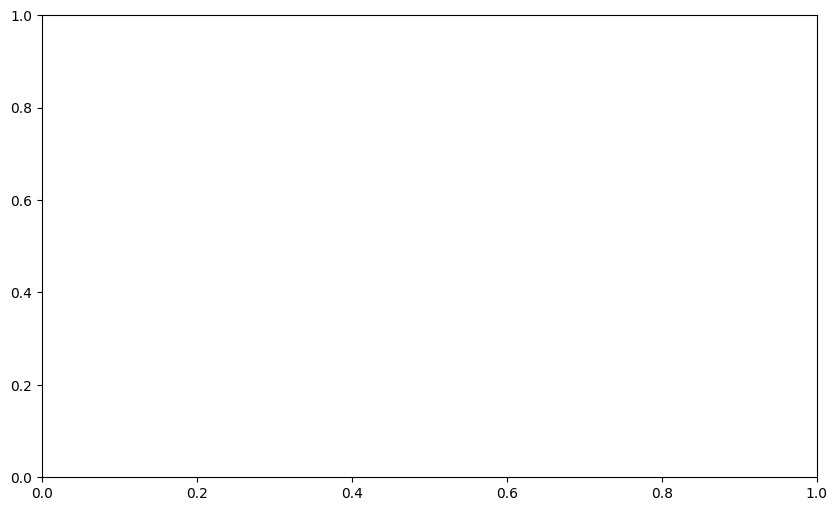

In [45]:
from summary_generator import generate_summary

# Generate Summary Dictionary
summary_dict=generate_summary(
    df=df,
    date_column=date_column,
    selected_date=selected_date,
    pkl_folder_name=pkl_folder_name,
)

In [13]:
df = df[df[date_column] <= selected_date].copy()

In [38]:
from summary_generator import generate_summary_data

df_summary_data=generate_summary_data(
    df=df,
    date_column=date_column,
    selected_date=selected_date,
)

In [ ]:
df_summary_data['Loans to households: Housing: Owner-occupied - pct']
'Loans to households: Housing: Owner-occupied - pct'
'Loans to households: Housing: Owner-occupied - pct'

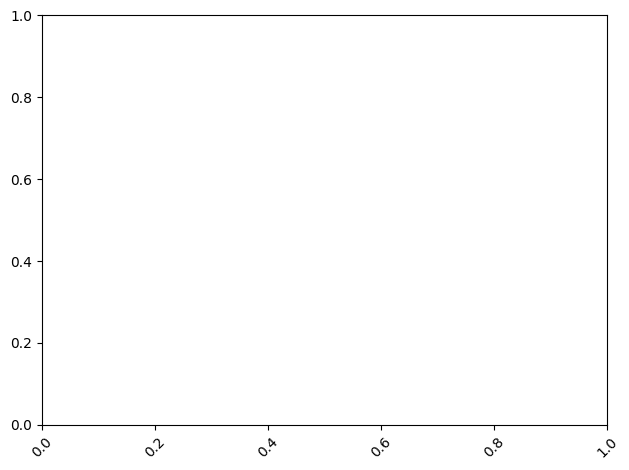

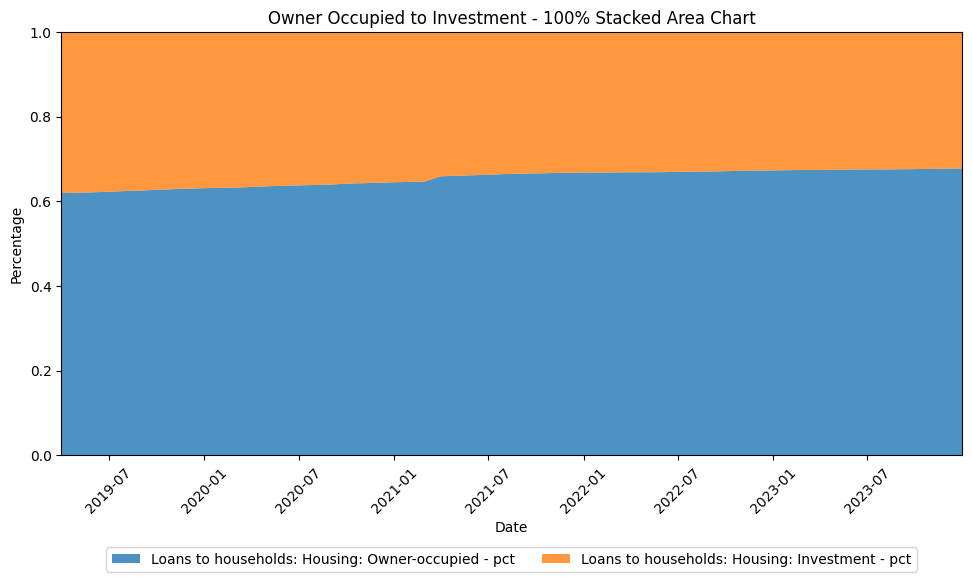

In [43]:
from summary_generator import generate_plots

fig = generate_plots(
    df=df_summary_data,
    date_column=date_column,
)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data: Months and values for Variable1 and Variable2
data = {
    'Date': pd.date_range(start='2023-01-01', periods=6, freq='M'),
    'Variable1': np.random.randint(10, 50, size=6),
    'Variable2': np.random.randint(20, 60, size=6),
}

df = pd.DataFrame(data)
df['Total'] = df['Variable1'] + df['Variable2']

# Calculate the percentage of each variable
df['Variable1_pct'] = df['Variable1'] / df['Total']
df['Variable2_pct'] = df['Variable2'] / df['Total']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(df['Date'], df['Variable1_pct'], df['Variable2_pct'], labels=['Variable1', 'Variable2'], alpha=0.8)

# Formatting the plot
ax.set_title('100% Stacked Area Chart')
ax.set_ylabel('Percentage')
ax.margins(0, 0)  # Remove empty space around the plot
ax.legend(loc='upper left')

plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()
plt.show()

# Filter Data

In [54]:
from archive.data_filtering import filter_data

dfs_dict, details_dicts = filter_data(
    df = df,
    date_column = date_column,
    selected_date = selected_date,
    selected_column = selected_column,
    category_column = company_column,
    selected_company = selected_company,
    top_x_company_list = top_x_company_list,
    group_by_columns = group_by_columns,
)

# print(details_dicts.keys())
# print(dfs_dict.keys())

c:\Users\tyewf\Documents\GitHub\rba_monthly_adi_statistics_excel\data_filtering.py:287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\tyewf\Documents\GitHub\rba_monthly_adi_statistics_excel\data_filtering.py:287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\tyewf\Documents\GitHub\rba_monthly_adi_statistics_excel\data_filtering.py:287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [50]:
dfs_dict.keys()

dict_keys(['original_df', 'dated_df', 'market_position_df', 'aggregates_df_dict', 'top_x_df_dict', 'MoM', 'YoY', '4 years'])

## Descriptions

In [736]:
from archive.descriptions import generate_descriptions

descriptions_dict = generate_descriptions(
    dfs_dict = dfs_dict,
    date_column = date_column,
    selected_column = selected_column,
    company_column = company_column,
    selected_company = selected_company,
    aliases_dict = aliases_dict,
    details_dicts = details_dicts,
)

# Chart

In [22]:
close_log_handlers()

In [55]:
from chart_generator import generate_charts

charts_dict = generate_charts(
    dfs_dict = dfs_dict,
    details_dicts = details_dicts,
    date_column = date_column,
    selected_date = selected_date,
    company_column = company_column,
    selected_company = selected_company,
    selected_column = selected_column,
    top_x_company_list = top_x_company_list,
    color_discrete_map = color_discrete_map,
)


c:\Users\tyewf\Documents\GitHub\rba_monthly_adi_statistics_excel\chart_generator.py:133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
charts_dict.keys()

# charts_dict['Business Loans']
charts_dict['Business Loans - MoM Movement ($)']
# charts_dict['Business Loans - MoM Movement (%)']
# charts_dict['Business Loans - YoY Movement ($)']
# charts_dict['Business Loans - YoY Movement (%)']
charts_dict['Business Loans - 4 years Movement ($)']
# charts_dict['Business Loans - 4 years Movement (%)']

In [19]:
dfs_dict['month']['percentage_movements_col_name']
dfs_dict['month'].keys()
'prefix'
'df'
'dollar_movements_col_name'
'movements_direction_col_name'
'percentage_movements_col_name'
'percentage_of_market_movements_col_name'
'selected_date'
'comparison_date'

dfs_dict['month']['dollar_movements_col_name']

'Business Loans - Month Movement ($)'

In [36]:
from utils import rounded_dollars

mom_df = dfs_dict['month']['df']
mom_df.loc[:, 'chart_txt'] = mom_df[dfs_dict['month']['dollar_movements_col_name']].apply(rounded_dollars)
mom_df.loc[:, 'chart_txt']
# .apply(lambda x: f"({x * 100:.1f} %)")

# formatted_percentages = top_x_df_current['Market Share'].apply(lambda x: f"({x * 100:.1f} %)")
dfs_dict.keys()
details_dicts.keys()

for months_ago in details_dicts['months_ago_list']:
    print(details_dicts[f'date_{months_ago}_wording'])

month
year
4 years


In [30]:
from chart_generator import chart_selected_col_bar

mom_df = dfs_dict['month']['df']
mom_df.loc[:, 'chart_txt'] = mom_df[dfs_dict['month']['dollar_movements_col_name']].apply(rounded_dollars)
chart_selected_col_bar(
    df = mom_df,
    company_column = company_column,
    reference_col = dfs_dict['month']['dollar_movements_col_name'],
    # title = dfs_dict['month']['dollar_movements_col_name'],
    ordered_category_list= details_dicts['ordered_company_list'],
    show_xaxis_labels = True,
    x_tickformat = None,
    x_gridcolor='Grey',
    color_discrete_map= color_discrete_map,
)

In [710]:
for key in charts_dict.keys():
    print(key)
#charts_dict['fig_balance_as_at'].show()
charts_dict['Business Loans']


Business Loans


In [711]:
from chart_generator import chart_selected_col_bar
from utils import get_months_ago_list

top_x_df = dfs_dict['top_x_df_dict']['df']
top_x_df
details_dicts

# Get number of months within data
months_ago_list = get_months_ago_list(
    df = top_x_df,
    date_column = date_column
)
months_ago_list


## 'date_0_months_ago': Timestamp('2023-12-31 00:00:00'),
##  'date_0_wording': 'current month',
##  'date_1_months_ago': Timestamp('2023-11-30 00:00:00'),
##  'date_1_wording': 'month',
##  'date_12_months_ago': Timestamp('2022-12-31 00:00:00'),
##  'date_12_wording': 'year',
##  'date_48_months_ago': Timestamp('2019-12-31 00:00:00'),
##  'date_48_wording': '4 years',

# top_x_df_current = top_x_df[top_x_df[date_column] == selected_date]
# formatted_dollars  = top_x_df_current[selected_column].apply(rounded_dollars)
# formatted_percentages = top_x_df_current['Market Share'].apply(lambda x: f"({x * 100:.1f} %)")
# top_x_df_current.loc[:, 'chart_txt'] = formatted_dollars + ' ' + formatted_percentages

# charts_dict[selected_column] = chart_selected_col_bar(
#         df = top_x_df_current,
#         category_column = category_column,
#         reference_col = f'{selected_column}',
#         ordered_category_list= details_dicts['ordered_category_list'],
#         show_xaxis_labels = True,
#         x_tickformat = None,
#         x_gridcolor='Grey',
#         color_discrete_map= color_discrete_map,
#     )

[1, 12, 48]

In [436]:
import plotly.express as px
fig = px.bar(
    data_frame=top_x_df_at_date,
    x=top_x_df_at_date['Market Share'] * 100,
    y=top_x_df_at_date[category_column],
    orientation='h',
    title=f"Test",
    color=category_column,
    # hover_name=None, hover_data=None, custom_data=None,
    text=top_x_df_at_date['txt'],
    # base=None, error_x=None, error_x_minus=None, error_y=None,
    # error_y_minus=None, animation_frame=None, animation_group=None,
    category_orders={category_column: ordered_category_list},  # Ensure custom order is applied
    # labels=None,
    color_discrete_sequence=[color_discrete_map['default_color']],
    color_discrete_map=color_discrete_map, # color_continuous_scale=None, pattern_shape_sequence=None, pattern_shape_map=None, range_color=None, color_continuous_midpoint=None, opacity=None,
    
    # barmode='relative', log_x=False, log_y=False, range_x=None, range_y=None, text_auto=False, title=None, template=None, width=None, height=None
)

# orientation='h',
# title=f"{reference_col}",
fig.update_layout(
    text=top_x_df_at_date['txt'])

fig.upda

# height=800

C:\Users\tyewf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



ValueError: Invalid property specified for object of type plotly.graph_objs.Layout: 'text'

Did you mean "font"?

    Valid properties:
        activeselection
            :class:`plotly.graph_objects.layout.Activeselection`
            instance or dict with compatible properties
        activeshape
            :class:`plotly.graph_objects.layout.Activeshape`
            instance or dict with compatible properties
        annotations
            A tuple of
            :class:`plotly.graph_objects.layout.Annotation`
            instances or dicts with compatible properties
        annotationdefaults
            When used in a template (as
            layout.template.layout.annotationdefaults), sets the
            default property values to use for elements of
            layout.annotations
        autosize
            Determines whether or not a layout width or height that
            has been left undefined by the user is initialized on
            each relayout. Note that, regardless of this attribute,
            an undefined layout width or height is always
            initialized on the first call to plot.
        autotypenumbers
            Using "strict" a numeric string in trace data is not
            converted to a number. Using *convert types* a numeric
            string in trace data may be treated as a number during
            automatic axis `type` detection. This is the default
            value; however it could be overridden for individual
            axes.
        bargap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        bargroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        barmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "relative", the bars
            are stacked on top of one another, with negative values
            below the axis, positive values above With "group", the
            bars are plotted next to one another centered around
            the shared location. With "overlay", the bars are
            plotted over one another, you might need to reduce
            "opacity" to see multiple bars.
        barnorm
            Sets the normalization for bar traces on the graph.
            With "fraction", the value of each bar is divided by
            the sum of all values at that location coordinate.
            "percent" is the same but multiplied by 100 to show
            percentages.
        boxgap
            Sets the gap (in plot fraction) between boxes of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        boxgroupgap
            Sets the gap (in plot fraction) between boxes of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        boxmode
            Determines how boxes at the same location coordinate
            are displayed on the graph. If "group", the boxes are
            plotted next to one another centered around the shared
            location. If "overlay", the boxes are plotted over one
            another, you might need to set "opacity" to see them
            multiple boxes. Has no effect on traces that have
            "width" set.
        calendar
            Sets the default calendar system to use for
            interpreting and displaying dates throughout the plot.
        clickmode
            Determines the mode of single click interactions.
            "event" is the default value and emits the
            `plotly_click` event. In addition this mode emits the
            `plotly_selected` event in drag modes "lasso" and
            "select", but with no event data attached (kept for
            compatibility reasons). The "select" flag enables
            selecting single data points via click. This mode also
            supports persistent selections, meaning that pressing
            Shift while clicking, adds to / subtracts from an
            existing selection. "select" with `hovermode`: "x" can
            be confusing, consider explicitly setting `hovermode`:
            "closest" when using this feature. Selection events are
            sent accordingly as long as "event" flag is set as
            well. When the "event" flag is missing, `plotly_click`
            and `plotly_selected` events are not fired.
        coloraxis
            :class:`plotly.graph_objects.layout.Coloraxis` instance
            or dict with compatible properties
        colorscale
            :class:`plotly.graph_objects.layout.Colorscale`
            instance or dict with compatible properties
        colorway
            Sets the default trace colors.
        computed
            Placeholder for exporting automargin-impacting values
            namely `margin.t`, `margin.b`, `margin.l` and
            `margin.r` in "full-json" mode.
        datarevision
            If provided, a changed value tells `Plotly.react` that
            one or more data arrays has changed. This way you can
            modify arrays in-place rather than making a complete
            new copy for an incremental change. If NOT provided,
            `Plotly.react` assumes that data arrays are being
            treated as immutable, thus any data array with a
            different identity from its predecessor contains new
            data.
        dragmode
            Determines the mode of drag interactions. "select" and
            "lasso" apply only to scatter traces with markers or
            text. "orbit" and "turntable" apply only to 3D scenes.
        editrevision
            Controls persistence of user-driven changes in
            `editable: true` configuration, other than trace names
            and axis titles. Defaults to `layout.uirevision`.
        extendfunnelareacolors
            If `true`, the funnelarea slice colors (whether given
            by `funnelareacolorway` or inherited from `colorway`)
            will be extended to three times its original length by
            first repeating every color 20% lighter then each color
            20% darker. This is intended to reduce the likelihood
            of reusing the same color when you have many slices,
            but you can set `false` to disable. Colors provided in
            the trace, using `marker.colors`, are never extended.
        extendiciclecolors
            If `true`, the icicle slice colors (whether given by
            `iciclecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendpiecolors
            If `true`, the pie slice colors (whether given by
            `piecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendsunburstcolors
            If `true`, the sunburst slice colors (whether given by
            `sunburstcolorway` or inherited from `colorway`) will
            be extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendtreemapcolors
            If `true`, the treemap slice colors (whether given by
            `treemapcolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        font
            Sets the global font. Note that fonts used in traces
            and other layout components inherit from the global
            font.
        funnelareacolorway
            Sets the default funnelarea slice colors. Defaults to
            the main `colorway` used for trace colors. If you
            specify a new list here it can still be extended with
            lighter and darker colors, see
            `extendfunnelareacolors`.
        funnelgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        funnelgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        funnelmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "group", the bars
            are plotted next to one another centered around the
            shared location. With "overlay", the bars are plotted
            over one another, you might need to reduce "opacity" to
            see multiple bars.
        geo
            :class:`plotly.graph_objects.layout.Geo` instance or
            dict with compatible properties
        grid
            :class:`plotly.graph_objects.layout.Grid` instance or
            dict with compatible properties
        height
            Sets the plot's height (in px).
        hiddenlabels
            hiddenlabels is the funnelarea & pie chart analog of
            visible:'legendonly' but it can contain many labels,
            and can simultaneously hide slices from several
            pies/funnelarea charts
        hiddenlabelssrc
            Sets the source reference on Chart Studio Cloud for
            `hiddenlabels`.
        hidesources
            Determines whether or not a text link citing the data
            source is placed at the bottom-right cored of the
            figure. Has only an effect only on graphs that have
            been generated via forked graphs from the Chart Studio
            Cloud (at https://chart-studio.plotly.com or on-
            premise).
        hoverdistance
            Sets the default distance (in pixels) to look for data
            to add hover labels (-1 means no cutoff, 0 means no
            looking for data). This is only a real distance for
            hovering on point-like objects, like scatter points.
            For area-like objects (bars, scatter fills, etc)
            hovering is on inside the area and off outside, but
            these objects will not supersede hover on point-like
            objects in case of conflict.
        hoverlabel
            :class:`plotly.graph_objects.layout.Hoverlabel`
            instance or dict with compatible properties
        hovermode
            Determines the mode of hover interactions. If
            "closest", a single hoverlabel will appear for the
            "closest" point within the `hoverdistance`. If "x" (or
            "y"), multiple hoverlabels will appear for multiple
            points at the "closest" x- (or y-) coordinate within
            the `hoverdistance`, with the caveat that no more than
            one hoverlabel will appear per trace. If *x unified*
            (or *y unified*), a single hoverlabel will appear
            multiple points at the closest x- (or y-) coordinate
            within the `hoverdistance` with the caveat that no more
            than one hoverlabel will appear per trace. In this
            mode, spikelines are enabled by default perpendicular
            to the specified axis. If false, hover interactions are
            disabled.
        iciclecolorway
            Sets the default icicle slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendiciclecolors`.
        images
            A tuple of :class:`plotly.graph_objects.layout.Image`
            instances or dicts with compatible properties
        imagedefaults
            When used in a template (as
            layout.template.layout.imagedefaults), sets the default
            property values to use for elements of layout.images
        legend
            :class:`plotly.graph_objects.layout.Legend` instance or
            dict with compatible properties
        mapbox
            :class:`plotly.graph_objects.layout.Mapbox` instance or
            dict with compatible properties
        margin
            :class:`plotly.graph_objects.layout.Margin` instance or
            dict with compatible properties
        meta
            Assigns extra meta information that can be used in
            various `text` attributes. Attributes such as the
            graph, axis and colorbar `title.text`, annotation
            `text` `trace.name` in legend items, `rangeselector`,
            `updatemenus` and `sliders` `label` text all support
            `meta`. One can access `meta` fields using template
            strings: `%{meta[i]}` where `i` is the index of the
            `meta` item in question. `meta` can also be an object
            for example `{key: value}` which can be accessed
            %{meta[key]}.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        minreducedheight
            Minimum height of the plot with margin.automargin
            applied (in px)
        minreducedwidth
            Minimum width of the plot with margin.automargin
            applied (in px)
        modebar
            :class:`plotly.graph_objects.layout.Modebar` instance
            or dict with compatible properties
        newselection
            :class:`plotly.graph_objects.layout.Newselection`
            instance or dict with compatible properties
        newshape
            :class:`plotly.graph_objects.layout.Newshape` instance
            or dict with compatible properties
        paper_bgcolor
            Sets the background color of the paper where the graph
            is drawn.
        piecolorway
            Sets the default pie slice colors. Defaults to the main
            `colorway` used for trace colors. If you specify a new
            list here it can still be extended with lighter and
            darker colors, see `extendpiecolors`.
        plot_bgcolor
            Sets the background color of the plotting area in-
            between x and y axes.
        polar
            :class:`plotly.graph_objects.layout.Polar` instance or
            dict with compatible properties
        scattergap
            Sets the gap (in plot fraction) between scatter points
            of adjacent location coordinates. Defaults to `bargap`.
        scattermode
            Determines how scatter points at the same location
            coordinate are displayed on the graph. With "group",
            the scatter points are plotted next to one another
            centered around the shared location. With "overlay",
            the scatter points are plotted over one another, you
            might need to reduce "opacity" to see multiple scatter
            points.
        scene
            :class:`plotly.graph_objects.layout.Scene` instance or
            dict with compatible properties
        selectdirection
            When `dragmode` is set to "select", this limits the
            selection of the drag to horizontal, vertical or
            diagonal. "h" only allows horizontal selection, "v"
            only vertical, "d" only diagonal and "any" sets no
            limit.
        selectionrevision
            Controls persistence of user-driven changes in selected
            points from all traces.
        selections
            A tuple of
            :class:`plotly.graph_objects.layout.Selection`
            instances or dicts with compatible properties
        selectiondefaults
            When used in a template (as
            layout.template.layout.selectiondefaults), sets the
            default property values to use for elements of
            layout.selections
        separators
            Sets the decimal and thousand separators. For example,
            *. * puts a '.' before decimals and a space between
            thousands. In English locales, dflt is ".," but other
            locales may alter this default.
        shapes
            A tuple of :class:`plotly.graph_objects.layout.Shape`
            instances or dicts with compatible properties
        shapedefaults
            When used in a template (as
            layout.template.layout.shapedefaults), sets the default
            property values to use for elements of layout.shapes
        showlegend
            Determines whether or not a legend is drawn. Default is
            `true` if there is a trace to show and any of these: a)
            Two or more traces would by default be shown in the
            legend. b) One pie trace is shown in the legend. c) One
            trace is explicitly given with `showlegend: true`.
        sliders
            A tuple of :class:`plotly.graph_objects.layout.Slider`
            instances or dicts with compatible properties
        sliderdefaults
            When used in a template (as
            layout.template.layout.sliderdefaults), sets the
            default property values to use for elements of
            layout.sliders
        smith
            :class:`plotly.graph_objects.layout.Smith` instance or
            dict with compatible properties
        spikedistance
            Sets the default distance (in pixels) to look for data
            to draw spikelines to (-1 means no cutoff, 0 means no
            looking for data). As with hoverdistance, distance does
            not apply to area-like objects. In addition, some
            objects can be hovered on but will not generate
            spikelines, such as scatter fills.
        sunburstcolorway
            Sets the default sunburst slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendsunburstcolors`.
        template
            Default attributes to be applied to the plot. This
            should be a dict with format: `{'layout':
            layoutTemplate, 'data': {trace_type: [traceTemplate,
            ...], ...}}` where `layoutTemplate` is a dict matching
            the structure of `figure.layout` and `traceTemplate` is
            a dict matching the structure of the trace with type
            `trace_type` (e.g. 'scatter'). Alternatively, this may
            be specified as an instance of
            plotly.graph_objs.layout.Template.  Trace templates are
            applied cyclically to traces of each type. Container
            arrays (eg `annotations`) have special handling: An
            object ending in `defaults` (eg `annotationdefaults`)
            is applied to each array item. But if an item has a
            `templateitemname` key we look in the template array
            for an item with matching `name` and apply that
            instead. If no matching `name` is found we mark the
            item invisible. Any named template item not referenced
            is appended to the end of the array, so this can be
            used to add a watermark annotation or a logo image, for
            example. To omit one of these items on the plot, make
            an item with matching `templateitemname` and `visible:
            false`.
        ternary
            :class:`plotly.graph_objects.layout.Ternary` instance
            or dict with compatible properties
        title
            :class:`plotly.graph_objects.layout.Title` instance or
            dict with compatible properties
        titlefont
            Deprecated: Please use layout.title.font instead. Sets
            the title font. Note that the title's font used to be
            customized by the now deprecated `titlefont` attribute.
        transition
            Sets transition options used during Plotly.react
            updates.
        treemapcolorway
            Sets the default treemap slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendtreemapcolors`.
        uirevision
            Used to allow user interactions with the plot to
            persist after `Plotly.react` calls that are unaware of
            these interactions. If `uirevision` is omitted, or if
            it is given and it changed from the previous
            `Plotly.react` call, the exact new figure is used. If
            `uirevision` is truthy and did NOT change, any
            attribute that has been affected by user interactions
            and did not receive a different value in the new figure
            will keep the interaction value. `layout.uirevision`
            attribute serves as the default for `uirevision`
            attributes in various sub-containers. For finer control
            you can set these sub-attributes directly. For example,
            if your app separately controls the data on the x and y
            axes you might set `xaxis.uirevision=*time*` and
            `yaxis.uirevision=*cost*`. Then if only the y data is
            changed, you can update `yaxis.uirevision=*quantity*`
            and the y axis range will reset but the x axis range
            will retain any user-driven zoom.
        uniformtext
            :class:`plotly.graph_objects.layout.Uniformtext`
            instance or dict with compatible properties
        updatemenus
            A tuple of
            :class:`plotly.graph_objects.layout.Updatemenu`
            instances or dicts with compatible properties
        updatemenudefaults
            When used in a template (as
            layout.template.layout.updatemenudefaults), sets the
            default property values to use for elements of
            layout.updatemenus
        violingap
            Sets the gap (in plot fraction) between violins of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        violingroupgap
            Sets the gap (in plot fraction) between violins of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        violinmode
            Determines how violins at the same location coordinate
            are displayed on the graph. If "group", the violins are
            plotted next to one another centered around the shared
            location. If "overlay", the violins are plotted over
            one another, you might need to set "opacity" to see
            them multiple violins. Has no effect on traces that
            have "width" set.
        waterfallgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        waterfallgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        waterfallmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "group", the bars are
            plotted next to one another centered around the shared
            location. With "overlay", the bars are plotted over one
            another, you might need to reduce "opacity" to see
            multiple bars.
        width
            Sets the plot's width (in px).
        xaxis
            :class:`plotly.graph_objects.layout.XAxis` instance or
            dict with compatible properties
        yaxis
            :class:`plotly.graph_objects.layout.YAxis` instance or
            dict with compatible properties
        
Did you mean "font"?

Bad property path:
text
^^^^

In [ ]:
go.Bar(
        name=segment,
        x=[share],  # Each segment's share
        y=['Market Share'],  # Common 'category' for all segments
        orientation='h',  # Make the bar horizontal        
        text=f"{share}%",  # Optionally display the percentage on the segment
        textposition='outside',
    ))

In [380]:
import plotly.graph_objects as go

# Market share segments and values
## segments = dfs_dict['market_position_df']['Institution Name']
## shares = dfs_dict['market_position_df']['Market Share'] * 100

fig = go.Figure()

# Accumulator to keep track of the x position for the annotation
accumulated_share = 0

# Segment to annotate
segment_to_annotate = 'Segment B'
annotation_text = ''  # We'll fill this in with the company's position and amount

for segment, share in zip(segments, shares):
    fig.add_trace(go.Bar(
        name=segment,
        x=[share],  # Each segment's share
        y=['Market Share'],  # Common 'category' for all segments
        orientation='h',  # Make the bar horizontal        
        text=f"{share}%",  # Optionally display the percentage on the segment
        textposition='outside',
    ))

    
    if segment == segment_to_annotate:
        # Set up annotation text
        annotation_text = f"{segment}: {share}%"
        # Position the annotation at the end of the current segment
        position_for_annotation = accumulated_share + share / 2
    
    # Update the accumulated share
    accumulated_share += share

# Add the annotation to the figure
fig.add_annotation(
    x=position_for_annotation,
    y='Market Share',
    text=annotation_text,
    showarrow=True,
    arrowhead=1,
    ax=20,  # Adjust arrow length and direction
    ay=-30,
)

# Update layout with stack mode and adjust other settings for aesthetics
fig.update_layout(
    title='Market Share by Segment',
    xaxis=dict(
        title='Percentage',
        ticksuffix="%",  # Add a percentage sign to x-axis ticks
        range=[0, 100]  # Ensure x-axis goes from 0 to 100 for the percentages
    ),
    yaxis=dict(
        title='',
        showticklabels=False  # Hide y-axis tick labels since there's only one 'category'
    ),
    barmode='stack',
    uniformtext_minsize=8, 
    uniformtext_mode='hide',
    legend_title_text='Segment',
    #title=f"Market Share",
    #color=category_column,
    category_orders={category_column: ordered_category_list},  # Ensure custom order is applied
    #color_discrete_map=color_discrete_map,
    #color_discrete_sequence=[color_discrete_map['default_color']],
)

fig.show()


ValueError: Invalid property specified for object of type plotly.graph_objs.Layout: 'category'

Did you mean "barnorm"?

    Valid properties:
        activeselection
            :class:`plotly.graph_objects.layout.Activeselection`
            instance or dict with compatible properties
        activeshape
            :class:`plotly.graph_objects.layout.Activeshape`
            instance or dict with compatible properties
        annotations
            A tuple of
            :class:`plotly.graph_objects.layout.Annotation`
            instances or dicts with compatible properties
        annotationdefaults
            When used in a template (as
            layout.template.layout.annotationdefaults), sets the
            default property values to use for elements of
            layout.annotations
        autosize
            Determines whether or not a layout width or height that
            has been left undefined by the user is initialized on
            each relayout. Note that, regardless of this attribute,
            an undefined layout width or height is always
            initialized on the first call to plot.
        autotypenumbers
            Using "strict" a numeric string in trace data is not
            converted to a number. Using *convert types* a numeric
            string in trace data may be treated as a number during
            automatic axis `type` detection. This is the default
            value; however it could be overridden for individual
            axes.
        bargap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        bargroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        barmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "relative", the bars
            are stacked on top of one another, with negative values
            below the axis, positive values above With "group", the
            bars are plotted next to one another centered around
            the shared location. With "overlay", the bars are
            plotted over one another, you might need to reduce
            "opacity" to see multiple bars.
        barnorm
            Sets the normalization for bar traces on the graph.
            With "fraction", the value of each bar is divided by
            the sum of all values at that location coordinate.
            "percent" is the same but multiplied by 100 to show
            percentages.
        boxgap
            Sets the gap (in plot fraction) between boxes of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        boxgroupgap
            Sets the gap (in plot fraction) between boxes of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        boxmode
            Determines how boxes at the same location coordinate
            are displayed on the graph. If "group", the boxes are
            plotted next to one another centered around the shared
            location. If "overlay", the boxes are plotted over one
            another, you might need to set "opacity" to see them
            multiple boxes. Has no effect on traces that have
            "width" set.
        calendar
            Sets the default calendar system to use for
            interpreting and displaying dates throughout the plot.
        clickmode
            Determines the mode of single click interactions.
            "event" is the default value and emits the
            `plotly_click` event. In addition this mode emits the
            `plotly_selected` event in drag modes "lasso" and
            "select", but with no event data attached (kept for
            compatibility reasons). The "select" flag enables
            selecting single data points via click. This mode also
            supports persistent selections, meaning that pressing
            Shift while clicking, adds to / subtracts from an
            existing selection. "select" with `hovermode`: "x" can
            be confusing, consider explicitly setting `hovermode`:
            "closest" when using this feature. Selection events are
            sent accordingly as long as "event" flag is set as
            well. When the "event" flag is missing, `plotly_click`
            and `plotly_selected` events are not fired.
        coloraxis
            :class:`plotly.graph_objects.layout.Coloraxis` instance
            or dict with compatible properties
        colorscale
            :class:`plotly.graph_objects.layout.Colorscale`
            instance or dict with compatible properties
        colorway
            Sets the default trace colors.
        computed
            Placeholder for exporting automargin-impacting values
            namely `margin.t`, `margin.b`, `margin.l` and
            `margin.r` in "full-json" mode.
        datarevision
            If provided, a changed value tells `Plotly.react` that
            one or more data arrays has changed. This way you can
            modify arrays in-place rather than making a complete
            new copy for an incremental change. If NOT provided,
            `Plotly.react` assumes that data arrays are being
            treated as immutable, thus any data array with a
            different identity from its predecessor contains new
            data.
        dragmode
            Determines the mode of drag interactions. "select" and
            "lasso" apply only to scatter traces with markers or
            text. "orbit" and "turntable" apply only to 3D scenes.
        editrevision
            Controls persistence of user-driven changes in
            `editable: true` configuration, other than trace names
            and axis titles. Defaults to `layout.uirevision`.
        extendfunnelareacolors
            If `true`, the funnelarea slice colors (whether given
            by `funnelareacolorway` or inherited from `colorway`)
            will be extended to three times its original length by
            first repeating every color 20% lighter then each color
            20% darker. This is intended to reduce the likelihood
            of reusing the same color when you have many slices,
            but you can set `false` to disable. Colors provided in
            the trace, using `marker.colors`, are never extended.
        extendiciclecolors
            If `true`, the icicle slice colors (whether given by
            `iciclecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendpiecolors
            If `true`, the pie slice colors (whether given by
            `piecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendsunburstcolors
            If `true`, the sunburst slice colors (whether given by
            `sunburstcolorway` or inherited from `colorway`) will
            be extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendtreemapcolors
            If `true`, the treemap slice colors (whether given by
            `treemapcolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        font
            Sets the global font. Note that fonts used in traces
            and other layout components inherit from the global
            font.
        funnelareacolorway
            Sets the default funnelarea slice colors. Defaults to
            the main `colorway` used for trace colors. If you
            specify a new list here it can still be extended with
            lighter and darker colors, see
            `extendfunnelareacolors`.
        funnelgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        funnelgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        funnelmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "group", the bars
            are plotted next to one another centered around the
            shared location. With "overlay", the bars are plotted
            over one another, you might need to reduce "opacity" to
            see multiple bars.
        geo
            :class:`plotly.graph_objects.layout.Geo` instance or
            dict with compatible properties
        grid
            :class:`plotly.graph_objects.layout.Grid` instance or
            dict with compatible properties
        height
            Sets the plot's height (in px).
        hiddenlabels
            hiddenlabels is the funnelarea & pie chart analog of
            visible:'legendonly' but it can contain many labels,
            and can simultaneously hide slices from several
            pies/funnelarea charts
        hiddenlabelssrc
            Sets the source reference on Chart Studio Cloud for
            `hiddenlabels`.
        hidesources
            Determines whether or not a text link citing the data
            source is placed at the bottom-right cored of the
            figure. Has only an effect only on graphs that have
            been generated via forked graphs from the Chart Studio
            Cloud (at https://chart-studio.plotly.com or on-
            premise).
        hoverdistance
            Sets the default distance (in pixels) to look for data
            to add hover labels (-1 means no cutoff, 0 means no
            looking for data). This is only a real distance for
            hovering on point-like objects, like scatter points.
            For area-like objects (bars, scatter fills, etc)
            hovering is on inside the area and off outside, but
            these objects will not supersede hover on point-like
            objects in case of conflict.
        hoverlabel
            :class:`plotly.graph_objects.layout.Hoverlabel`
            instance or dict with compatible properties
        hovermode
            Determines the mode of hover interactions. If
            "closest", a single hoverlabel will appear for the
            "closest" point within the `hoverdistance`. If "x" (or
            "y"), multiple hoverlabels will appear for multiple
            points at the "closest" x- (or y-) coordinate within
            the `hoverdistance`, with the caveat that no more than
            one hoverlabel will appear per trace. If *x unified*
            (or *y unified*), a single hoverlabel will appear
            multiple points at the closest x- (or y-) coordinate
            within the `hoverdistance` with the caveat that no more
            than one hoverlabel will appear per trace. In this
            mode, spikelines are enabled by default perpendicular
            to the specified axis. If false, hover interactions are
            disabled.
        iciclecolorway
            Sets the default icicle slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendiciclecolors`.
        images
            A tuple of :class:`plotly.graph_objects.layout.Image`
            instances or dicts with compatible properties
        imagedefaults
            When used in a template (as
            layout.template.layout.imagedefaults), sets the default
            property values to use for elements of layout.images
        legend
            :class:`plotly.graph_objects.layout.Legend` instance or
            dict with compatible properties
        mapbox
            :class:`plotly.graph_objects.layout.Mapbox` instance or
            dict with compatible properties
        margin
            :class:`plotly.graph_objects.layout.Margin` instance or
            dict with compatible properties
        meta
            Assigns extra meta information that can be used in
            various `text` attributes. Attributes such as the
            graph, axis and colorbar `title.text`, annotation
            `text` `trace.name` in legend items, `rangeselector`,
            `updatemenus` and `sliders` `label` text all support
            `meta`. One can access `meta` fields using template
            strings: `%{meta[i]}` where `i` is the index of the
            `meta` item in question. `meta` can also be an object
            for example `{key: value}` which can be accessed
            %{meta[key]}.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        minreducedheight
            Minimum height of the plot with margin.automargin
            applied (in px)
        minreducedwidth
            Minimum width of the plot with margin.automargin
            applied (in px)
        modebar
            :class:`plotly.graph_objects.layout.Modebar` instance
            or dict with compatible properties
        newselection
            :class:`plotly.graph_objects.layout.Newselection`
            instance or dict with compatible properties
        newshape
            :class:`plotly.graph_objects.layout.Newshape` instance
            or dict with compatible properties
        paper_bgcolor
            Sets the background color of the paper where the graph
            is drawn.
        piecolorway
            Sets the default pie slice colors. Defaults to the main
            `colorway` used for trace colors. If you specify a new
            list here it can still be extended with lighter and
            darker colors, see `extendpiecolors`.
        plot_bgcolor
            Sets the background color of the plotting area in-
            between x and y axes.
        polar
            :class:`plotly.graph_objects.layout.Polar` instance or
            dict with compatible properties
        scattergap
            Sets the gap (in plot fraction) between scatter points
            of adjacent location coordinates. Defaults to `bargap`.
        scattermode
            Determines how scatter points at the same location
            coordinate are displayed on the graph. With "group",
            the scatter points are plotted next to one another
            centered around the shared location. With "overlay",
            the scatter points are plotted over one another, you
            might need to reduce "opacity" to see multiple scatter
            points.
        scene
            :class:`plotly.graph_objects.layout.Scene` instance or
            dict with compatible properties
        selectdirection
            When `dragmode` is set to "select", this limits the
            selection of the drag to horizontal, vertical or
            diagonal. "h" only allows horizontal selection, "v"
            only vertical, "d" only diagonal and "any" sets no
            limit.
        selectionrevision
            Controls persistence of user-driven changes in selected
            points from all traces.
        selections
            A tuple of
            :class:`plotly.graph_objects.layout.Selection`
            instances or dicts with compatible properties
        selectiondefaults
            When used in a template (as
            layout.template.layout.selectiondefaults), sets the
            default property values to use for elements of
            layout.selections
        separators
            Sets the decimal and thousand separators. For example,
            *. * puts a '.' before decimals and a space between
            thousands. In English locales, dflt is ".," but other
            locales may alter this default.
        shapes
            A tuple of :class:`plotly.graph_objects.layout.Shape`
            instances or dicts with compatible properties
        shapedefaults
            When used in a template (as
            layout.template.layout.shapedefaults), sets the default
            property values to use for elements of layout.shapes
        showlegend
            Determines whether or not a legend is drawn. Default is
            `true` if there is a trace to show and any of these: a)
            Two or more traces would by default be shown in the
            legend. b) One pie trace is shown in the legend. c) One
            trace is explicitly given with `showlegend: true`.
        sliders
            A tuple of :class:`plotly.graph_objects.layout.Slider`
            instances or dicts with compatible properties
        sliderdefaults
            When used in a template (as
            layout.template.layout.sliderdefaults), sets the
            default property values to use for elements of
            layout.sliders
        smith
            :class:`plotly.graph_objects.layout.Smith` instance or
            dict with compatible properties
        spikedistance
            Sets the default distance (in pixels) to look for data
            to draw spikelines to (-1 means no cutoff, 0 means no
            looking for data). As with hoverdistance, distance does
            not apply to area-like objects. In addition, some
            objects can be hovered on but will not generate
            spikelines, such as scatter fills.
        sunburstcolorway
            Sets the default sunburst slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendsunburstcolors`.
        template
            Default attributes to be applied to the plot. This
            should be a dict with format: `{'layout':
            layoutTemplate, 'data': {trace_type: [traceTemplate,
            ...], ...}}` where `layoutTemplate` is a dict matching
            the structure of `figure.layout` and `traceTemplate` is
            a dict matching the structure of the trace with type
            `trace_type` (e.g. 'scatter'). Alternatively, this may
            be specified as an instance of
            plotly.graph_objs.layout.Template.  Trace templates are
            applied cyclically to traces of each type. Container
            arrays (eg `annotations`) have special handling: An
            object ending in `defaults` (eg `annotationdefaults`)
            is applied to each array item. But if an item has a
            `templateitemname` key we look in the template array
            for an item with matching `name` and apply that
            instead. If no matching `name` is found we mark the
            item invisible. Any named template item not referenced
            is appended to the end of the array, so this can be
            used to add a watermark annotation or a logo image, for
            example. To omit one of these items on the plot, make
            an item with matching `templateitemname` and `visible:
            false`.
        ternary
            :class:`plotly.graph_objects.layout.Ternary` instance
            or dict with compatible properties
        title
            :class:`plotly.graph_objects.layout.Title` instance or
            dict with compatible properties
        titlefont
            Deprecated: Please use layout.title.font instead. Sets
            the title font. Note that the title's font used to be
            customized by the now deprecated `titlefont` attribute.
        transition
            Sets transition options used during Plotly.react
            updates.
        treemapcolorway
            Sets the default treemap slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendtreemapcolors`.
        uirevision
            Used to allow user interactions with the plot to
            persist after `Plotly.react` calls that are unaware of
            these interactions. If `uirevision` is omitted, or if
            it is given and it changed from the previous
            `Plotly.react` call, the exact new figure is used. If
            `uirevision` is truthy and did NOT change, any
            attribute that has been affected by user interactions
            and did not receive a different value in the new figure
            will keep the interaction value. `layout.uirevision`
            attribute serves as the default for `uirevision`
            attributes in various sub-containers. For finer control
            you can set these sub-attributes directly. For example,
            if your app separately controls the data on the x and y
            axes you might set `xaxis.uirevision=*time*` and
            `yaxis.uirevision=*cost*`. Then if only the y data is
            changed, you can update `yaxis.uirevision=*quantity*`
            and the y axis range will reset but the x axis range
            will retain any user-driven zoom.
        uniformtext
            :class:`plotly.graph_objects.layout.Uniformtext`
            instance or dict with compatible properties
        updatemenus
            A tuple of
            :class:`plotly.graph_objects.layout.Updatemenu`
            instances or dicts with compatible properties
        updatemenudefaults
            When used in a template (as
            layout.template.layout.updatemenudefaults), sets the
            default property values to use for elements of
            layout.updatemenus
        violingap
            Sets the gap (in plot fraction) between violins of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        violingroupgap
            Sets the gap (in plot fraction) between violins of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        violinmode
            Determines how violins at the same location coordinate
            are displayed on the graph. If "group", the violins are
            plotted next to one another centered around the shared
            location. If "overlay", the violins are plotted over
            one another, you might need to set "opacity" to see
            them multiple violins. Has no effect on traces that
            have "width" set.
        waterfallgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        waterfallgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        waterfallmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "group", the bars are
            plotted next to one another centered around the shared
            location. With "overlay", the bars are plotted over one
            another, you might need to reduce "opacity" to see
            multiple bars.
        width
            Sets the plot's width (in px).
        xaxis
            :class:`plotly.graph_objects.layout.XAxis` instance or
            dict with compatible properties
        yaxis
            :class:`plotly.graph_objects.layout.YAxis` instance or
            dict with compatible properties
        
Did you mean "barnorm"?

Bad property path:
category_orders
^^^^^^^^

In [248]:
import plotly.graph_objects as go

# Market share segments (assuming these are parts of a whole for a single category)
segments = ['Segment A', 'Segment B', 'Segment C']
shares = [40, 35, 25]  # Represents the market shares in percentages

fig = go.Figure()

# Add a trace for each segment of the market share
for segment, share in zip(segments, shares):
    fig.add_trace(go.Bar(
        name=segment,
        x=[share],  # Each segment's share
        y=['Market Share'],  # Common 'category' for all segments
        orientation='h',  # Make the bar horizontal
        text=f"{share}%",  # Display the percentage on the segment
        textposition='inside',
    ))

# Update the layout for a 100% stacked look
fig.update_layout(
    title='Market Share by Segment',
    xaxis=dict(
        title='Percentage',
        ticksuffix="%",  # Add a percentage sign to x-axis ticks
        range=[0, 100]  # Ensure x-axis goes from 0 to 100 for the percentages
    ),
    yaxis=dict(
        title='',  # No specific title needed for a single category
        showticklabels=False  # Hide y-axis tick labels since there's only one 'category'
    ),
    barmode='stack',
    uniformtext_minsize=8, 
    uniformtext_mode='hide',
    legend_title_text='Segment'
)

fig.show()


In [245]:
import plotly.graph_objects as go

aggregates_df = dfs_dict['aggregates_df_dict']['df']
aggregates_df_category_col = dfs_dict['aggregates_df_dict']['category_col']
aggregates_df_dollar_col = dfs_dict['aggregates_df_dict']['dollar_col']
aggregates_df_dollar_movements_col = dfs_dict['aggregates_df_dict']['dollar_movements_col']
aggregates_df_percentage_movements_col = dfs_dict['aggregates_df_dict']['percentage_movements_col']

aggregates_df_selected_date = aggregates_df[aggregates_df[date_column] == selected_date]
aggregates_df_selected_date.head(5)

categories = aggregates_df_selected_date[aggregates_df_category_col]
values = aggregates_df_selected_date[aggregates_df_dollar_col]

# Create the treemap
fig = go.Figure(go.Treemap(
    labels=categories,
    values=values,
    parents=[""] * len(categories),  # Indicates no parent for all items
    textinfo="label+value"  # Display labels and values on the treemap
))

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

fig.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Treemap(
    labels=["Parent", "Child 1", "Child 2", "Child 3"],  # Names of each sector
    parents=["", "Parent", "Parent", "Parent"],  # Defines the hierarchy
    values=[10, 20, 15, 5],  # Size of each sector
    textinfo="label+value"
))

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

fig.show()


In [48]:
from chart_generator import growth_over_time

fig = growth_over_time(
    category_df = dfs_dict['top_x_df'][dfs_dict['top_x_df'][category_column] == selected_category].copy(),
    date_column = date_column,
    chart_column = f'{selected_column} Movement ($)',
)
fig


In [46]:
dfs_dict['top_x_df']['Business Loans Movement ($)']

,Period,Institution Name,Business Loans,Business Loans Movement ($),Business Loans Movement (%)
0,2019-03-31,Australia and New Zealand Banking Group Limited,1.305555e+11,NaN,NaN
17,2019-04-30,Australia and New Zealand Banking Group Limited,1.265449e+11,-4.010600e+09,-0.030720
34,2019-05-31,Australia and New Zealand Banking Group Limited,1.266298e+11,8.490000e+07,0.000671
51,2019-06-30,Australia and New Zealand Banking Group Limited,1.270493e+11,4.195000e+08,0.003313
68,2019-07-31,Australia and New Zealand Banking Group Limited,1.293160e+11,2.266700e+09,0.017841
...,...,...,...,...,...
917,2023-08-31,other,1.612986e+11,4.277000e+09,0.027238
934,2023-09-30,other,1.624169e+11,1.118300e+09,0.006933
951,2023-10-31,other,1.621575e+11,-2.594000e+08,-0.001597
968,2023-11-30,other,1.630558e+11,8.983000e+08,0.005540


In [45]:
import pandas as pd
import plotly.graph_objects as go
import datetime as dt

category_df = dfs_dict['top_x_df'][dfs_dict['top_x_df'][category_column] == selected_category].copy()
category_df

# Preparing the DataFrame
category_df['Year'] = category_df[date_column].dt.year
category_df['Month'] = category_df[date_column].dt.strftime('%B')  # Full month name
category_df['MonthIndex'] = category_df[date_column].dt.month  # To ensure correct month sorting

pivot_df = category_df.pivot_table(index=['Month', 'MonthIndex'], columns='Year', values=selected_column, aggfunc='sum').reset_index().sort_values('MonthIndex')
pivot_df

# Plotly graph
fig = go.Figure()

# Add a bar trace for each year
for year in pivot_df.columns[2:]:  # Skipping 'Month' and 'MonthIndex' columns
    fig.add_trace(go.Bar(
        x=pivot_df['Month'],
        y=pivot_df[year],
        name=str(year),
    ))

# Customize layout
fig.update_layout(
    title='Monthly Values Over Years',
    xaxis_title='Month',
    yaxis_title='Value',
    barmode='group',  # Grouped bar chart
    xaxis={'categoryorder':'array', 'categoryarray':pivot_df['Month']}  # Ensure correct month order
)

# Show figure
fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Sample data creation
# Create a date range from January of the first year to December of the fifth year
dates = pd.date_range(start='2016-01-01', end='2020-12-31', freq='M')

# Create sample data for demonstration
import numpy as np
data = {
    'Date': dates,
    'Series1': np.random.rand(len(dates)) * 1000,  # Example data series
    'Series2': np.random.rand(len(dates)) * 1000,  # Another example data series
    # Add more series if needed
}

df = pd.DataFrame(data)

# Convert 'Date' to datetime and extract year and month for grouping
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%b')  # Convert month to abbreviated name

# Plotly graph
fig = go.Figure()

# Add traces for each year
for year in df['Year'].unique():
    for series in ['Series1', 'Series2']:  # Loop through each data series
        fig.add_trace(go.Bar(
            x=df[df['Year'] == year]['Month'],
            y=df[df['Year'] == year][series],
            name=f'{series} {year}',
            # Customize further as needed
        ))

# Customize layout
fig.update_layout(
    title='Monthly Data for 5 Years',
    xaxis_title='Month',
    yaxis_title='Value',
    barmode='group',  # Use 'group' for grouped bar chart, 'stack' for stacked
)

# Show figure
fig.show()


In [21]:
charts_dict[selected_column]
dfs_dict['original_df']

In [ ]:
import plotly.graph_objects as go

def chart_treemap(
        categories,
        values,
):

    # Create the treemap
    fig = go.Figure(go.Treemap(
        labels=categories,
        values=values,
        parents=[""] * len(categories),  # Indicates no parent for all items
        textinfo="label+value"  # Display labels and values on the treemap
    ))

    fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

    fig.show()

aggregates_df = dfs_dict['aggregates_df']
aggregates_df_dated = aggregates_df[aggregates_df[date_column] == selected_date]


chart_treemap(
        categories = aggregates_df_dated['Account'],
        values = aggregates_df_dated['Value'],
)

# Tabs

In [33]:
from utils import rounded_dollars_md, escape_dollar_signs

details_dicts['ordered_category_list']
aggregates_df = dfs_dict['aggregates_df']
aggregates_df_account = aggregates_df[aggregates_df['Account'] == selected_column]


rounded_dollars_md(aggregates_df_account['Value'].iloc[-1])
aggregates_df_account['Value'].iloc[-2]
escape_dollar_signs(rounded_dollars_md(aggregates_df_account['Value'].iloc[-1]))

INFO:utils:1.18
INFO:utils:1.18


'\\$&nbsp;1.18&nbsp;Trn'

In [73]:
aggregates_df_account
dfs_dict['aggregates_df']
# dfs_dict['top_x_df']

,Period,Account,Value,Value Movement ($),Value Movement (%)
928,2019-03-31,Acceptances,2.654000e+08,NaN,NaN
929,2019-04-30,Acceptances,3.185000e+08,5.310000e+07,0.200075
930,2019-05-31,Acceptances,3.752000e+08,5.670000e+07,0.178022
931,2019-06-30,Acceptances,6.384000e+08,2.632000e+08,0.701493
932,2019-07-31,Acceptances,2.715000e+08,-3.669000e+08,-0.574718
...,...,...,...,...,...
111,2023-08-31,Trading securities,8.481230e+10,-2.611500e+09,-0.029872
112,2023-09-30,Trading securities,8.460500e+10,-2.073000e+08,-0.002444
113,2023-10-31,Trading securities,8.424410e+10,-3.609000e+08,-0.004266
114,2023-11-30,Trading securities,9.157700e+10,7.332900e+09,0.087043


In [53]:
from IPython.display import display, Markdown, Latex
display(Markdown(escape_dollar_signs(rounded_dollars_md(aggregates_df_account['Value'].iloc[-1]))))
tst = Markdown(escape_dollar_signs(rounded_dollars_md(aggregates_df_account['Value'].iloc[-1])))
print(tst)
display(Markdown('**Hi** hello'))

INFO:utils:1.18


\$&nbsp;1.18&nbsp;Trn

INFO:utils:1.18


<IPython.core.display.Markdown object>


**Hi** hello

In [49]:
escape_dollar_signs(
        f" - The Net Total for {reference_col} is {rounded_dollars_md(df[reference_col].sum())}"
    )

NameError: name 'reference_col' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data: Months and values for Variable1 and Variable2
data = {
    'Date': pd.date_range(start='2023-01-01', periods=6, freq='M'),
    'Variable1': np.random.randint(10, 50, size=6),
    'Variable2': np.random.randint(20, 60, size=6),
}

df = pd.DataFrame(data)
df['Total'] = df['Variable1'] + df['Variable2']

# Calculate the percentage of each variable
df['Variable1_pct'] = df['Variable1'] / df['Total']
df['Variable2_pct'] = df['Variable2'] / df['Total']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(df['Date'], df['Variable1_pct'], df['Variable2_pct'], labels=['Variable1', 'Variable2'], alpha=0.8)

# Formatting the plot
ax.set_title('100% Stacked Area Chart')
ax.set_ylabel('Percentage')
ax.margins(0, 0)  # Remove empty space around the plot
ax.legend(loc='upper left')

plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()
plt.show()
